In [1]:
import pandas as pd
import numpy as np
# import pydot

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

from sklearn.metrics import f1_score,roc_curve,auc,precision_score,recall_score

from sklearn.metrics import confusion_matrix

import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.api as smd
from statsmodels.stats.proportion import proportions_ztest

# 가설검정, 분산분석하는 패키지
from statsmodels.formula.api import ols # 분산분석하기? 모델링?
from statsmodels.stats.anova import anova_lm # 아노바 데이터프레임 형태 출력
from scipy.stats import shapiro
%matplotlib inline
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit

# font_path = 'C:/Windows/Fonts/gulim.ttc'
font_path = 'C:/Windows/Fonts/gulim.ttc'
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family = font_name)

from matplotlib import font_manager,rc

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.api import qqplot, add_constant

# from sklearn.tree import export_graphviz
# import graphviz

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
# import pydot

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

from sklearn.metrics import f1_score,roc_curve,auc,precision_score,recall_score

from sklearn.metrics import confusion_matrix

import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.api as smd
from statsmodels.stats.proportion import proportions_ztest

# 가설검정, 분산분석하는 패키지
from statsmodels.formula.api import ols # 분산분석하기? 모델링?
from statsmodels.stats.anova import anova_lm # 아노바 데이터프레임 형태 출력
from scipy.stats import shapiro
%matplotlib inline
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit

# # font_path = 'C:/Windows/Fonts/gulim.ttc'
# font_path = '/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
# font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
# matplotlib.rc('font', family = font_name)

from matplotlib import font_manager,rc

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.api import qqplot, add_constant

# from sklearn.tree import export_graphviz
# import graphviz

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df_raw = pd.read_csv('review_2.csv',encoding='euckr')

In [3]:
df_raw.isna().sum()

Unnamed: 0              0
customer_id             0
review_cat              0
judge                   0
review_date             0
gender                  0
age                     0
height                  0
weight                  0
bust                    0
waist                   0
bmi                     0
whtr                    0
bp_min                  0
bp_max                  0
pulse_count             0
bt_chol               875
bt_crea              2639
bt_gluc               875
bt_hb                1852
bt_hbsa               875
bt_hct               1852
bt_mch               1852
bt_mchc              1852
bt_mvc               1852
bt_plat              1852
bt_rbc               1852
bt_wbc               1852
bt_rgpt              2400
bt_sgot              2305
bt_sgpt               875
bt_trig              2371
judge_score             0
bp_judge                0
pulse_count_judge       0
bt_chol_judge         875
bt_crea_judge         875
bt_gluc_judge         875
bt_hb_judge 

In [4]:
g_2 = df_raw[df_raw['review_cat'] !='혈액검사'].drop('Unnamed: 0',axis=1)
g_2

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,n_risk
2,C112411,일반검진,재검,2015-09-20,1,69,165,70,92,88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,C112570,일반검진,재검,2015-05-27,1,67,165,75,95,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,C112727,일반검진,승인,2015-06-24,1,65,160,50,89,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,C112730,일반검진,승인,2015-09-01,1,65,164,64,97,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,C112742,일반검진,승인,2015-09-02,1,65,169,62,89,72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,C134107,일반검진,재검,2015-07-12,2,55,158,63,98,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4075,C134186,일반검진,승인,2015-05-12,2,38,161,65,94,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4076,C134188,일반검진,승인,2015-06-22,1,41,175,78,100,92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4080,C134250,일반검진,승인,2015-09-16,2,52,164,60,90,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [5]:
g_2.isna().sum()

customer_id            0
review_cat             0
judge                  0
review_date            0
gender                 0
age                    0
height                 0
weight                 0
bust                   0
waist                  0
bmi                    0
whtr                   0
bp_min                 0
bp_max                 0
pulse_count            0
bt_chol              875
bt_crea              875
bt_gluc              875
bt_hb                875
bt_hbsa              875
bt_hct               875
bt_mch               875
bt_mchc              875
bt_mvc               875
bt_plat              875
bt_rbc               875
bt_wbc               875
bt_rgpt              875
bt_sgot              875
bt_sgpt              875
bt_trig              875
judge_score            0
bp_judge               0
pulse_count_judge      0
bt_chol_judge        875
bt_crea_judge        875
bt_gluc_judge        875
bt_hb_judge          875
bt_hbsa_judge        875
bt_hct_judge         875


In [6]:
g_test = g_2[['customer_id','gender', 'age',
       'height', 'weight', 'bust', 'waist', 'bmi', 'whtr', 'bp_min', 'bp_max',
       'pulse_count', 'bp_judge', 'pulse_count_judge', 'judge_score', 'n_risk']]

In [7]:
g_test

,customer_id,gender,age,height,weight,bust,waist,bmi,whtr,bp_min,bp_max,pulse_count,bp_judge,pulse_count_judge,judge_score,n_risk
2,C112411,1,69,165,70,92,88,25.711662,0.533333,75,120,68,0,0,0,0.0
3,C112570,1,67,165,75,95,89,27.548209,0.539394,90,140,70,1,0,1,0.0
4,C112727,1,65,160,50,89,66,19.531250,0.412500,80,130,64,1,0,0,0.0
5,C112730,1,65,164,64,97,80,23.795360,0.487805,80,125,68,1,0,0,0.0
6,C112742,1,65,169,62,89,72,21.707923,0.426036,80,120,70,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,C134107,2,55,158,63,98,80,25.236340,0.506329,80,135,70,1,0,1,0.0
4075,C134186,2,38,161,65,94,80,25.076193,0.496894,70,110,72,0,0,0,0.0
4076,C134188,1,41,175,78,100,92,25.469388,0.525714,80,110,66,0,0,0,1.0
4080,C134250,2,52,164,60,90,66,22.308150,0.402439,80,120,70,0,0,0,0.0


## 탐색적 분석

In [8]:
def myhist(data,var):
    plt.hist(data[data['n_risk']==0][var],label = '저위험', alpha = 0.5)
    plt.hist(data[data['n_risk']==1][var],label = '고위험', alpha = 0.5)
    plt.legend()
    
def mycrosstab(data,var) : 
    print(pd.crosstab(index = data['n_risk'], columns = data[var]))
    print()
    print(pd.crosstab(index = data['n_risk'], columns = data[var],normalize = 'columns').round(3))
    
def my_t(data,var):
    k = stats.levene(data[data['n_risk']==0][var],data[data['n_risk']==1][var])
    t_result = stats.ttest_ind(data[data['n_risk']==0][[var]],
                               data[data['n_risk']==1][[var]],equal_var=True) # 2 sample 비교 명령어

    t,p = t_result
    print(k,p)

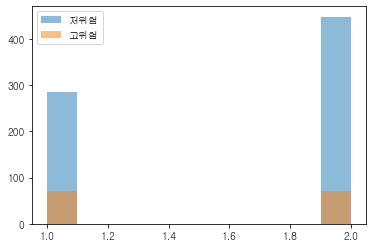

In [9]:
myhist(g_test,'gender')

In [10]:
mycrosstab(g_test,'gender')

gender    1    2
n_risk          
0.0     285  448
1.0      71   71

gender      1      2
n_risk              
0.0     0.801  0.863
1.0     0.199  0.137


In [11]:
a = 285 ; b = 448 ; c = 71 ; d = 71

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3))) # 유의

p-value는 0.014


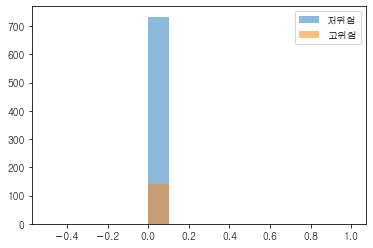

In [12]:
myhist(g_test,'pulse_count_judge') # pulse count 1 고객 존재 X -> 판단 불가, 제외

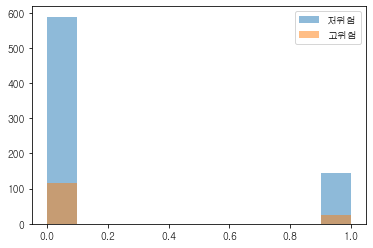

In [13]:
myhist(g_test,'bp_judge')

In [14]:
mycrosstab(g_test,'bp_judge')

bp_judge    0    1
n_risk            
0.0       589  144
1.0       116   26

bp_judge      0      1
n_risk                
0.0       0.835  0.847
1.0       0.165  0.153


In [15]:
a = 589 ; b = 144 ; c = 116 ; d = 26

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3)))

p-value는 0.713


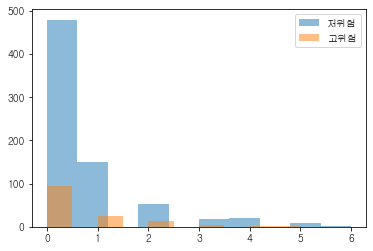

In [16]:
myhist(g_test,'judge_score')

In [17]:
mycrosstab(g_test,'judge_score')

judge_score    0    1   2   3   4  5  6
n_risk                                 
0.0          479  151  53  17  21  9  3
1.0           95   26  13   5   1  2  0

judge_score      0      1      2      3      4      5    6
n_risk                                                    
0.0          0.834  0.853  0.803  0.773  0.955  0.818  1.0
1.0          0.166  0.147  0.197  0.227  0.045  0.182  0.0


In [18]:
df = pd.DataFrame({'A':[479,151,53,17,21,9,3],'B':[95,26,13,5,1,2,0]})
chi, p, dof, expected = stats.chi2_contingency(df.T) #테이블 형태로 넣는다는 의미
print('검정 통계량은 {0} p-value는 {1})'.format(chi.round(3), p.round(6)))

검정 통계량은 4.441 p-value는 0.617276)


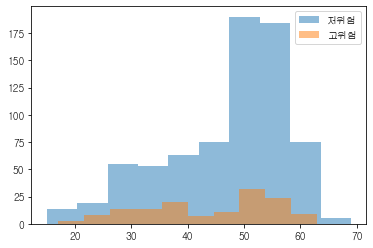

In [19]:
myhist(g_test,'age')

In [20]:
my_t(g_test,'age') # 유의

LeveneResult(statistic=7.114618605396788, pvalue=0.007787378994579735) [0.00156345]


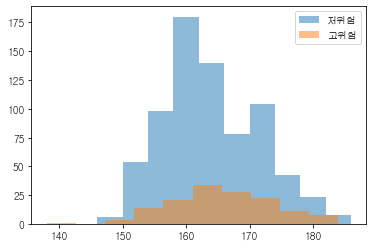

In [21]:
myhist(g_test,'height')

In [22]:
my_t(g_test,'height')

LeveneResult(statistic=0.5678228512762958, pvalue=0.45132853061646405) [0.00055806]


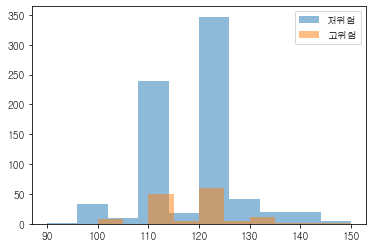

In [23]:
myhist(g_test,'bp_max')

In [24]:
my_t(g_test,'bp_max')

LeveneResult(statistic=0.0023458317027234953, pvalue=0.9613816108951024) [0.5794904]


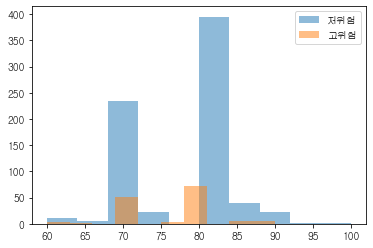

In [25]:
myhist(g_test,'bp_min')

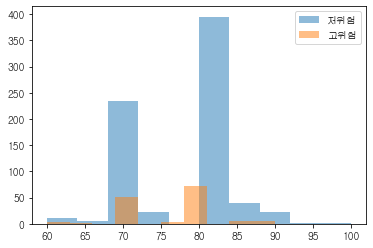

In [26]:
myhist(g_test,'bp_min')

In [27]:
my_t(g_test,'bp_min')

LeveneResult(statistic=0.7162103330525019, pvalue=0.3976217214384107) [0.25362709]


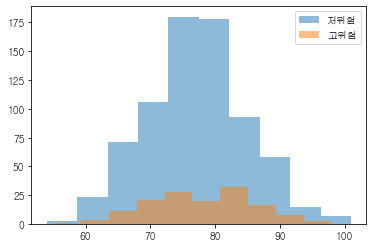

In [28]:
myhist(g_test,'waist')

In [29]:
my_t(g_test,'waist')

LeveneResult(statistic=1.507716950551717, pvalue=0.2198187490807891) [0.24114989]


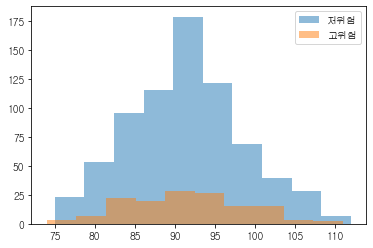

In [30]:
myhist(g_test,'bust')

In [31]:
my_t(g_test,'bust')

LeveneResult(statistic=0.14139366986853383, pvalue=0.7069907854160677) [0.91420643]


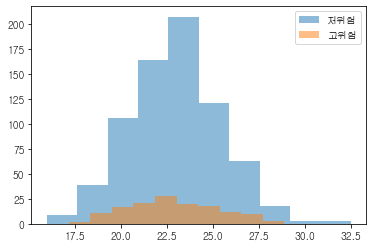

In [32]:
myhist(g_test,'bmi')

In [33]:
my_t(g_test,'bmi')

LeveneResult(statistic=0.09561488170350056, pvalue=0.7572305799322043) [0.51389012]


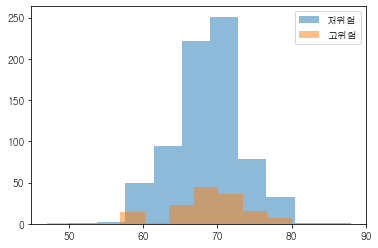

In [34]:
myhist(g_test,'pulse_count')

In [35]:
my_t(g_test,'pulse_count')

LeveneResult(statistic=1.3198954096185116, pvalue=0.2509254950564661) [0.89366557]


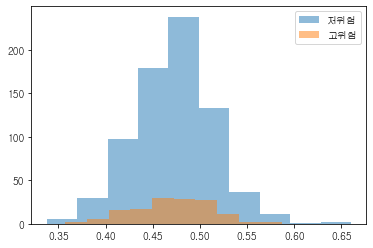

In [36]:
myhist(g_test,'whtr')

In [37]:
my_t(g_test,'whtr')

LeveneResult(statistic=0.11395394346291973, pvalue=0.7357679126218739) [0.58561526]


#### age, gender 유의

### 로지스틱 탐색

In [38]:
g_num = g_test.select_dtypes(exclude = 'object')

In [39]:
log_model = Logit.from_formula(''' n_risk ~ C(gender) + age + height + bust
+bmi+whtr+bp_min+bp_max+pulse_count + C(pulse_count_judge) +C(judge_score)+ waist + weight+
C(bp_judge)''',data = g_num)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

         Current function value: 0.422293
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 n_risk   No. Observations:                  875
Model:                          Logit   Df Residuals:                      855
Method:                           MLE   Df Model:                           19
Date:                Thu, 07 May 2020   Pseudo R-squ.:                 0.04769
Time:                        13:47:02   Log-Likelihood:                -369.51
converged:                      False   LL-Null:                       -388.01
Covariance Type:            nonrobust   LLR p-value:                  0.007915
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    16.0468     25.492      0.629      0.529     -33.917      66.011
C(gender)[T.2]      

C:\Users\BHU\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [40]:
df_x = g_num.drop(['n_risk','waist','weight'],axis = 1)
df_x # 종속 변수 빼고 새롭게 데이터 프레임 생성
df_x_const = add_constant(df_x) # const열 생성

df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF',inplace=True)
df_vif.round(3) # 다중공선성 존재 X -> 회귀식 자체로 판단

,variable,VIF
12,judge_score,1.014
11,pulse_count_judge,1.035
9,pulse_count,1.048
2,age,1.305
10,bp_judge,1.902
1,gender,2.634
5,bmi,3.033
7,bp_min,3.343
6,whtr,3.418
3,height,3.486


In [41]:
log_model = Logit.from_formula(''' n_risk ~ C(gender) + age + height + bust
+bmi+whtr+bp_min+bp_max+pulse_count + C(pulse_count_judge) +C(judge_score)+
C(bp_judge)''',data = g_num)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

         Current function value: 0.422843
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 n_risk   No. Observations:                  875
Model:                          Logit   Df Residuals:                      857
Method:                           MLE   Df Model:                           17
Date:                Thu, 07 May 2020   Pseudo R-squ.:                 0.04645
Time:                        13:47:03   Log-Likelihood:                -369.99
converged:                      False   LL-Null:                       -388.01
Covariance Type:            nonrobust   LLR p-value:                  0.004523
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -7.9299      4.270     -1.857      0.063     -16.299       0.439
C(gender)[T.2]      

C:\Users\BHU\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### 다중 공선성

In [42]:
df_y = g_num['n_risk']
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 4).fit(df_x,df_y)
# df_x는 다중 공선성으로 제거 후 남은 x인자만 존재
selected_cols = df_x.columns[rfe.support_]
removed_cols = df_x.columns[~rfe.support_]

print("select variables : ",selected_cols)
print("removed variable : ",removed_cols)

select variables :  Index(['gender', 'bmi', 'whtr', 'pulse_count_judge'], dtype='object')
removed variable :  Index(['age', 'height', 'bust', 'bp_min', 'bp_max', 'pulse_count', 'bp_judge',
       'judge_score'],
      dtype='object')


In [43]:
log_model = Logit.from_formula(''' n_risk ~ C(gender)+bmi+whtr+pulse_count_judge''',data = g_num)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

         Current function value: 0.436956
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 n_risk   No. Observations:                  875
Model:                          Logit   Df Residuals:                      870
Method:                           MLE   Df Model:                            4
Date:                Thu, 07 May 2020   Pseudo R-squ.:                 0.01462
Time:                        13:47:03   Log-Likelihood:                -382.34
converged:                      False   LL-Null:                       -388.01
Covariance Type:            nonrobust   LLR p-value:                   0.02292
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.2939      1.123     -0.262      0.794      -2.495       1.908
C(gender)[T.2]       -0.5239      0.192     

C:\Users\BHU\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### 유의수준 

In [44]:
log_model = Logit.from_formula(''' n_risk ~ age + height + bust
+whtr''',data = g_num)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

Optimization terminated successfully.
         Current function value: 0.431070
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 n_risk   No. Observations:                  875
Model:                          Logit   Df Residuals:                      870
Method:                           MLE   Df Model:                            4
Date:                Thu, 07 May 2020   Pseudo R-squ.:                 0.02790
Time:                        13:47:04   Log-Likelihood:                -377.19
converged:                       True   LL-Null:                       -388.01
Covariance Type:            nonrobust   LLR p-value:                 0.0002354
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.1855      2.414     -3.391      0.001     -12.917      -3.454
age           -0.0212      0.

### 정확도/정밀도 RF 모델

- 변수 정리 : 'age','height','bust','whtr' 0.825 / 0.625
- 검정 결과 : 'age','gender'
- 다중 공선성 : 'gender', 'bmi', 'whtr', 'pulse_count_judge'

## 모델링

In [54]:
ensem_x = g_test[['age','height','bust','whtr']]
ensem_y = g_test[['n_risk']]

ensem_x = pd.get_dummies(ensem_x)

# scaler = StandardScaler()
# en_sc = scaler.fit_transform(ensem_x)
# ensem_x = pd.DataFrame(en_sc,columns=ensem_x.columns)

# 데이터 분할 1 : 학습용과 시험용

train_x, test_x, train_y, test_y = train_test_split(ensem_x,ensem_y,test_size=0.3,random_state = 1234)
# 학습용 데이터를 밸리데이션과 학습용으로 분할함으로써 CV진행 준비
train_x, val_x, train_y, val_y = train_test_split(train_x,train_y,test_size = 3/7, random_state = 1234)

In [55]:
gb_final = RandomForestClassifier(random_state=1234)
gb_final.fit(train_x,train_y)

print()
print('초기 모델의 train data의 설명력 : {:.3f}'.format(gb_final.score(train_x,train_y)))
print('초기 모델의 validation data의 설명력 : {:.3f}'.format(gb_final.score(val_x,val_y)))
print('초기 모델의 test data의 설명력 : {:.3f}'.format(gb_final.score(test_x,test_y)))

C:\Users\BHU\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  



초기 모델의 train data의 설명력 : 1.000
초기 모델의 validation data의 설명력 : 0.814
초기 모델의 test data의 설명력 : 0.825


In [56]:
y_pred=gb_final.predict(test_x)
print('Accuracy:{0:.3f}\n'.format(gb_final.score(test_x,test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(test_y,y_pred)))

#분석 모델
model=['GradientBoosting']
#정확도 저장
train_accuracy=[]; test_accuracy=[]
#f1 score 저장
model_f1_score=[]
#auc score 저장
model_auc=[]
#precision score저장
model_precision_score=[]
#recall score 저장
model_recall_score=[]

#최종 모델
gb_model=RandomForestClassifier(random_state=1234)
gb_model.fit(train_x,train_y)
# train 정확도
train_accuracy.append(gb_model.score(train_x, train_y))
# test 정확도
test_accuracy.append(gb_model.score(test_x, test_y))
#최종 모델을 이용한 분류 예측
y_pred=gb_model.predict(test_x)
#roc_curve(실제값,예측값) fpr=(FP)/(FP+TN):거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성비율(재현율)
fpr,tpr,thresholds=roc_curve(test_y,y_pred)
roc_auc=auc(fpr,tpr)
#auc 저장
model_auc.append(roc_auc)

#f1스코어
model_f1_score.append(f1_score(test_y,y_pred))
#precision 스코어
model_precision_score.append(precision_score(test_y,y_pred))
#recall 스코어
model_recall_score.append(recall_score(test_y,y_pred))

df_eval=pd.DataFrame(index=model)
df_eval['TrainAccuracy']=train_accuracy
df_eval['TestAccuracy']=test_accuracy
df_eval['F1Score']=model_f1_score
df_eval['AUC']=model_auc
df_eval['PrecisionScore']=model_precision_score
df_eval['RecallScore']=model_recall_score
df_eval.round(3)

Accuracy:0.825

Confusion matrix:
[[212   3]
 [ 43   5]]


C:\Users\BHU\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


,TrainAccuracy,TestAccuracy,F1Score,AUC,PrecisionScore,RecallScore
GradientBoosting,1.0,0.825,0.179,0.545,0.625,0.104


-> 정밀도 고려 최종 변수 선택 : 'age','height','bust','whtr'

-> 일반검사 기준 낮은 정밀도, 추가적인 건강검진 기준 보완 요구(Screen data 활용)

## 2분류 거절 고객 분류

In [67]:
df_danger = pd.read_csv('danger_reject_g.csv',encoding='euckr')
df_danger = df_danger[['customer_id']]
df_danger

,customer_id
0,C112409
1,C112414
2,C112421
3,C112437
4,C112449
...,...
471,C134023
472,C134058
473,C134153
474,C134160


In [69]:
df_raw = pd.read_csv('insu_pre_review.csv',encoding='euckr')
df_test = df_raw[df_raw['judge']=='거절']
df_test = df_test[df_test['review_cat'] != '혈액검사']
df_test = pd.merge(df_danger,df_test,on='customer_id',how='left')
df_test
df_reject = df_test[['age','height','bust','whtr']]

# df_reject = pd.get_dummies(df_reject)
# en_sc_2 = scaler.fit_transform(df_reject)
# df_reject = pd.DataFrame(en_sc_2,columns=df_reject.columns)

In [70]:
df_reject

,age,height,bust,whtr
0,69,178,99,0.505618
1,68,165,94,0.533333
2,69,165,93,0.496970
3,68,163,100,0.515337
4,67,164,93,0.481707
...,...,...,...,...
471,63,156,90,0.525641
472,69,158,103,0.569620
473,37,161,80,0.428571
474,53,150,91,0.546667


In [71]:
pred = gb_model.predict(df_reject)
df_reject['n_risk'] = pred
df_reject['customer_id'] = df_test['customer_id']

C:\Users\BHU\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\BHU\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
df_reject.groupby('n_risk').count()

,age,height,bust,whtr,customer_id
n_risk,,,,,
0.0,469,469,469,469,469
1.0,7,7,7,7,7


### 저위험 고객 469명, 고위험 고객 7명 -> 혈액 검사 기준
### 고위험 고객 거절 유지, 저위험 고객 상품 추천 및 할증 진행

In [73]:
# 데이터 내보내기

df_high = df_reject[df_reject['n_risk'] == 1][['customer_id']]
df_low = df_reject[df_reject['n_risk'] == 0][['customer_id']]

df_high.to_csv('high_danger_g.csv',encoding='euckr')
df_low.to_csv('low_danger_g.csv',encoding='euckr')